In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
merged_df = pd.read_csv('datasets/CSV/pytorch-final-without-outliers_new_v2.csv')
#merged_df
#X_train, X_test, y_train, y_test = train_test_split(merged_df[['floors', 'useful_area', 'apartments', 'total_area', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11']], merged_df[['area_Basement/slab', 'area_Roof/attic', 'area_Walls', 'area_doors', 'area_windows', 'U_Basement/slab', 'U_Roof/attic', 'U_Walls', 'U_doors', 'U_windows']], test_size=0.2, random_state=42)



In [2]:
merged_df

,cadastre_number,floors,useful_area,apartments,total_area,serie,area_Basement/slab,area_Roof/attic,area_Walls,area_doors,...,5,6,7,8,9,10,11,Heavy,Light,energy_consumption
0,1000702031001,9,13077.4,252,15673.6,101,1013.73,1043.93,1830.05,60.88,...,0,0,0,0,0,0,0,True,False,1379.9275
1,1000660229001,5,1930.5,45,2478.7,316,412.80,515.90,1062.10,15.60,...,0,0,0,1,0,0,0,True,False,529.7575
2,1000660171001,5,1927.5,45,2477.7,316,417.00,515.90,1054.60,15.60,...,0,0,0,1,0,0,0,True,False,0.0000
3,1000660177001,5,1583.7,30,2041.9,103,321.40,379.50,913.10,8.30,...,0,0,0,0,0,0,0,True,False,194.5575
4,1000670322003,5,2189.3,53,2731.9,316,495.80,590.50,1381.70,8.90,...,0,0,0,1,0,0,0,True,False,304.5025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,1000870260004,2,194.8,4,272.3,110,119.93,110.88,279.06,2.88,...,0,1,0,0,0,0,0,True,False,0.0000
252,1000860273001,4,1201.1,12,1433.3,0,259.00,308.56,957.38,13.69,...,0,0,0,0,0,0,0,True,False,136.7300
253,1000840185001,3,586.4,10,771.5,0,226.04,262.22,526.03,12.00,...,0,0,0,0,0,0,0,False,True,0.0000
254,1000280019001,4,665.1,12,750.7,0,120.50,142.10,596.92,6.65,...,0,0,0,0,0,0,0,True,False,86.8000


In [3]:
import torch
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import torch.nn.functional as F
from pytorch_lightning import seed_everything, LightningModule, Trainer, LightningDataModule
from pytorch_lightning.callbacks import EarlyStopping
from pytorch_lightning.profilers import SimpleProfiler
from torch import nn, optim, rand, sum as tsum, reshape, save
from torch.utils.data import DataLoader, Dataset
from torch.optim.lr_scheduler import ReduceLROnPlateau
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from sklearn.model_selection import KFold

"""
class MyDatasetexample(Dataset):
    
     def __init__(self, file_name):
          merged_df = pd.read_csv(file_name)
          X_train, X_test, y_train, y_test = train_test_split(merged_df[['floors', 'useful_area', 'apartments', 'total_area', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]], merged_df[['area_Basement/slab', 'area_Roof/attic', 'area_Walls', 'area_doors', 'area_windows', 'U_Basement/slab', 'U_Roof/attic', 'U_Walls', 'U_doors', 'U_windows']], test_size=0.2, random_state=42)
          
          y_train = y_train.iloc[0:257, 1:10].values
          #x = pd.concat([df.iloc[:,0:4],df.iloc[:,15:27]],axis = 1).values
          #y = df.iloc[0:257, 5:15].values

          scaler = StandardScaler()
          X_train = scaler.fit_transform(X_train)
          self.X_train = torch.tensor(X_train, dtype=torch.float32)
          self.y_train = torch.tensor(y_train)
     
     def __len__(self):
          return len(self.y_train)
     
     def __getitem__(self, idx):
          return self.X_train[idx], self.y_train[idx]
"""          

"\nclass MyDatasetexample(Dataset):\n    \n     def __init__(self, file_name):\n          merged_df = pd.read_csv(file_name)\n          X_train, X_test, y_train, y_test = train_test_split(merged_df[['floors', 'useful_area', 'apartments', 'total_area', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]], merged_df[['area_Basement/slab', 'area_Roof/attic', 'area_Walls', 'area_doors', 'area_windows', 'U_Basement/slab', 'U_Roof/attic', 'U_Walls', 'U_doors', 'U_windows']], test_size=0.2, random_state=42)\n          \n          y_train = y_train.iloc[0:257, 1:10].values\n          #x = pd.concat([df.iloc[:,0:4],df.iloc[:,15:27]],axis = 1).values\n          #y = df.iloc[0:257, 5:15].values\n\n          scaler = StandardScaler()\n          X_train = scaler.fit_transform(X_train)\n          self.X_train = torch.tensor(X_train, dtype=torch.float32)\n          self.y_train = torch.tensor(y_train)\n     \n     def __len__(self):\n          return len(self.y_train)\n     \n     def __getitem__(self, idx):\n    

SECOND TRY WITH DATASET and one DNN

In [4]:
from sklearn.model_selection import train_test_split

class CustomDataset(Dataset):
    def __init__(self, data_path, input_cols, target_col, val_cols, scaler_input, scaler_output, scaler_validation, train, indices=None):
        data = pd.read_csv(data_path)
        self.input_cols = input_cols
        self.target_col = target_col
        self.val_cols = val_cols
        self.scaler_input = scaler_input
        self.scaler_output = scaler_output
        self.scaler_validation = scaler_validation
        self.preprocess_and_scale(data, train, indices)

    def preprocess_and_scale(self, data, train, indices):
        if indices is None:
            indices = range(len(data))

        train_data, validation_data = train_test_split(indices, test_size=0.15, random_state=42)
        if train == 0:
            self.data = data.iloc[train_data]
        elif train == 1:
            self.data = data.iloc[validation_data]
        else:
            self.data = data.iloc[indices]

        self.input_data = self.data[self.input_cols].values
        self.target_data = self.data[self.target_col].values
        self.val_data = self.data[self.val_cols].values

        self.input_data = self.scaler_input.fit_transform(self.input_data)
        self.target_data = self.scaler_output.fit_transform(self.target_data)
        self.val_data = self.scaler_validation.fit_transform(self.val_data)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        inputs = torch.tensor(self.input_data[idx], dtype=torch.float32)
        targets = torch.tensor(self.target_data[idx], dtype=torch.float32)
        validation = torch.tensor(self.val_data[idx], dtype=torch.float32)
        return inputs, targets, validation


In [5]:

        

from pytorch_lightning.utilities.types import EVAL_DATALOADERS


class DNN(LightningModule):
    def __init__(self, input_dim, hidden_dim, output_dim, scaler_input,scaler_output,scaler_validation):
        super(DNN, self).__init__()
        self.save_hyperparameters()
        self.input_dim = input_dim
        self.scaler_input = scaler_input
        self.scaler_output = scaler_output
        self.scaler_validation = scaler_validation
        
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim,hidden_dim)
        self.fc4 = nn.Linear(hidden_dim,hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, output_dim)
        
        
    def forward(self, x):
        x = self.fc1(x)
        x = torch.relu(x)
        x = self.fc2(x)
        #x = torch.relu(x)
        #x = self.fc4(x)
        x = torch.relu(x)
        x = self.fc3(x)
        #print(x.shape)
        #x = x.unsqueeze(-1)
        #x = self.calculate_energy_consumption(x,self.inputs)
        
        #x= self.calculate_energy_consumption()
        #x = self.scaler.inverse(x)
        #prepei na gurnaei kai to y(energy consumption)
        #mallon na gurnaei kai ta heat losses gia to pie chart
        return x
    
    #TRAINING
    def training_step(self, batch, batch_idx):
        inputs, targets, val_energy_consumption = batch
       
        #self.inputs = inputs
        y_hat = self.forward(inputs)
        loss = self.custom_loss(y_hat, targets, inputs, val_energy_consumption)  
        #print(y_hat)
        #self.log( 'predictions' , y_hat)
        self.log('train_loss', loss.mean(), on_epoch=True)
        
      
        return loss.mean()
    
    #VALIDATION
    def validation_step(self, batch, batch_idx):
        inputs, targets, val_energy_consumption = batch
        
        #self.inputs = inputs
        y_hat = self.forward(inputs)
        loss = self.custom_loss(y_hat, targets, inputs, val_energy_consumption)

        mse = torch.mean(torch.pow(torch.abs(y_hat - targets),2))
        self.log("val_loss", mse)
        self.log("avg_val_loss", loss.mean(), on_epoch=True)  
        return {'val_loss': mse}
        
    #TESTING
    def test_step(self, batch, batch_idx):
        inputs, targets, val_energy_consumption = batch
        
        y_hat = self.forward(inputs)
        loss = self.custom_loss(y_hat, targets, inputs, val_energy_consumption)

        self.log('test_loss', loss.mean(), on_epoch=True)

        mse = torch.mean(torch.pow(torch.abs(y_hat - targets),2))
        self.log('mse', mse, on_epoch=True)
        return {"test_loss": loss, "mse": mse}

    #PREDICTION
    def predict_step(self, batch, batch_idx):
        inputs, targets, val_energy_consumption = batch
       
        predictions = self.forward(inputs)
        energy_consumption = self.calculate_energy_consumption(predictions,inputs)
        """
        predictions_numpy = predictions.detach().numpy()
        subset1 = predictions_numpy[:, :6]  
        subset2 = predictions_numpy[:, 6:]
        unscaled_subset1 = self.scaler_output_test_areas.inverse_transform(subset1)
        unscaled_subset2 = self.scaler_output_test_U.inverse_transform(subset2)
        predictions_unscaled = np.concatenate((unscaled_subset1, unscaled_subset2), axis=1)
        """
        #predictions_unscaled = self.scaler_output.inverse_transform(predictions.detach().numpy())
        #predictions_unscaled = torch.from_numpy(predictions_unscaled)
        predictions_unscaled = self.scaler_output.inverse_transform(predictions.detach().numpy())
        predictions_unscaled = torch.from_numpy(predictions_unscaled.copy())

        return energy_consumption, predictions_unscaled
        
    def configure_optimizers(self):
        optimizer = optim.Adam(self.parameters(), lr=0.001)
        lr_scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor=0.1, patience=5, verbose=True)
        return {
            'optimizer': optimizer,
            'lr_scheduler': lr_scheduler,
            'monitor': 'val_loss'
        }
        #return optimizer
    
    def custom_loss(self, y_hat, targets, inputs, val_energy_consumption):
        
        #print(y_hat.shape)
        #print(targets.shape)
       
        errors = torch.abs(y_hat - targets)
        mean_errors = torch.mean(torch.pow(errors,2), dim=1)
        
        
        
        a = torch.where(val_energy_consumption != 0, torch.tensor(1.0), torch.tensor(0.0))

     
        
        
        energy_consumption = self.calculate_energy_consumption(y_hat, inputs)
        #print(energy_consumption)
        #print(inputs)
        # o mpampas sotiris eipe na vgalw ton scaler eksw gia na mh ginetai scale ana batch, auto
      
        #val_energy_consumption = self.scaler_validation.fit_transform(val_energy_consumption)
       
        energy_consumption = self.scaler_validation.transform(energy_consumption.reshape(-1,1))
        #print(energy_consumption)
        #new min max scaler
        #mean squared error
        #print(a)
        
        energy_consumption_absolute_loss = torch.abs(val_energy_consumption-energy_consumption)
        energy_consumption_mean_absolute_loss = torch.mean(torch.pow(energy_consumption_absolute_loss,2),dim=1)
        #print(energy_consumption_mean_absolute_loss)
        # Calculate the energy consumption using predictions F(x)
        #energy_consumption = self.calculate_energy_consumption(y_hat, inputs)
        #print(energy_consumption)
       
        a_expanded = a.view(-1)
        
        energy_consumption_mean_absolute_square_loss = a_expanded * energy_consumption_mean_absolute_loss
        loss = mean_errors + energy_consumption_mean_absolute_square_loss
        #loss = torch.cat((mean_errors.unsqueeze(1), energy_consumption_mean_absolute_square_loss.unsqueeze(1)), dim=1)
        #print(loss)
        
        return loss
    
    def calculate_energy_consumption(self, predictions, inputs):
        
        #print(prediction
        # s)
        #print(inputs)
        """
        predictions_numpy = predictions.detach().numpy()
        subset1 = predictions_numpy[:, :6]  
        subset2 = predictions_numpy[:, 6:]
        unscaled_subset1 = self.scaler_output_areas.inverse_transform(subset1)
        unscaled_subset2 = self.scaler_output_U.inverse_transform(subset2)
        predictions_unscaled = np.concatenate((unscaled_subset1, unscaled_subset2), axis=1)

        
        """
        predictions_unscaled = self.scaler_output.inverse_transform(predictions.detach().numpy())
        predictions_unscaled = torch.from_numpy(predictions_unscaled)
        inputs_unscaled = self.scaler_input.inverse_transform(inputs.detach().numpy())
        inputs_unscaled = torch.from_numpy(inputs_unscaled)
        
       
        areas_columns = predictions_unscaled[:, :5]
        #print(predictions_unscaled)
        u_columns = predictions_unscaled[:, 5:10]
        #remaining_columns = [:,-2] 
        remaining_columns = predictions_unscaled[:, 10:]

# Extracting specific values from the remaining columns
        h = remaining_columns[:, 0]
        specific_heat_gains = remaining_columns[:, 1]
        #specific_heat_gains = predictions_unscaled[:, 5]#specific heat gains
          
        #h = predictions_unscaled[:,-1] #air exchange rate
      
        #print(areas_columns)
        #print(u_columns)
        #print(remaining_columns.size())
        #envelope heat losses
        heat_losses = areas_columns * u_columns * (18.9) * 192 * 24 / 1000
      
        thermal_bridges = torch.sum(heat_losses, dim=1, keepdim=True) * 0.03
        
        envelope_heat_losses = torch.sum(torch.cat((heat_losses, thermal_bridges), dim=1), dim=1)
        #envelope_heat_losses = torch.add(heat_losses,thermal_bridges)
        

        #ventilation heat losses
        useful_area = inputs_unscaled[:,0]
        
        V = useful_area * 2.5 # 2.8 is average indoor height
        
        
        ventilation_heat_loss_coefficient = V * h *0.34
        ventilation_heat_losses = ventilation_heat_loss_coefficient * 18.9 * 192 * 24 / 1000
        
        
        #total heat losses
        total_heat_losses = torch.add(envelope_heat_losses,ventilation_heat_losses)
       
        total_heat_gains = specific_heat_gains*V

        #print(total_heat_losses)
        #final calculations tsekare gia diairesh me to 0
        ratio = torch.abs(total_heat_gains/total_heat_losses)
        if inputs_unscaled[-1][-1] == 0:
            # heavy buildings
            building_type = 54.2 #inputs['building_type'] IT SHOULD BE IN INPUTS | currently the value is for heavy tsekare gia diairesh me to 0
        else:
            # light buildings
            building_type = 23.1
        building_time_constant = building_type * useful_area / ( total_heat_losses / (192*24) / 18.9 * 10 ** 6)
        divide = torch.div(building_time_constant,30)
        numerical_parameter = torch.add(divide,0.8)
        
        heat_gain_usage_factor = torch.div((1 - torch.pow(ratio,numerical_parameter)) , (1 - torch.pow(ratio, torch.add(numerical_parameter,1))))
        
        energy_consumption = torch.sub(total_heat_losses, torch.mul(total_heat_gains,heat_gain_usage_factor))
        


        #print(energy_consumption/1000)

        
        #energy_consumption = torch.sum(predictions)
        
        return energy_consumption/1000
    
    def train_dataloader(self):
        return DataLoader(self.train_dataset, batch_size=1, shuffle=True)
    
    def test_dataloader(self):
        return DataLoader(self.test_dataset, batch_size=1, shuffle=False)
    
    def val_dataloader(self):
        return DataLoader(self.validation_dataset, batch_size=1, shuffle=False)
    
    def predict_dataloader(self):
        return self.test_dataloader()
    


In [6]:
scaler_input = MinMaxScaler()
scaler_output = StandardScaler()
scaler_validation = MinMaxScaler()

input_cols = ['useful_area', 'floors', 'apartments', 'total_area', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', 'Heavy', 'Light']
target_col = ['area_Basement/slab', 'area_Roof/attic', 'area_Walls', 'area_doors', 'area_windows', 'U_Basement/slab', 'U_Roof/attic', 'U_Walls', 'U_doors', 'U_windows', 'air_exchange', 'specific_heat_gains']
val_cols = ['energy_consumption']

# Example cross-validation loop
num_folds = 10
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

profiler = SimpleProfiler()

# Initialize lists to store performance metrics across folds
test_metrics = []
all_test_preds = []
all_test_actual = []
all_test_pred_energy = []
all_test_actual_energy = []
for fold, (train_index, val_index) in enumerate(kf.split(pd.read_csv('datasets/CSV/pytorch-final-without-outliers_new.csv'))):
    print(f"Fold {fold + 1}/{num_folds}")

    # Training dataset
    train_dataset = CustomDataset('datasets/CSV/pytorch-final-without-outliers_new_v2.csv', input_cols, target_col, val_cols, scaler_input, scaler_output, scaler_validation, train=0, indices=train_index)
    # Validation dataset
    validation_dataset = CustomDataset('datasets/CSV/pytorch-final-without-outliers_new_v2.csv', input_cols, target_col, val_cols, scaler_input, scaler_output, scaler_validation, train=2, indices=val_index)
    # Test dataset
    test_dataset = CustomDataset('datasets/CSV/pytorch-final-without-outliers_new_v2.csv', input_cols, target_col, val_cols, scaler_input, scaler_output, scaler_validation, train=1)

    profiler = SimpleProfiler()
    trainer = Trainer(max_epochs=40, profiler=profiler, callbacks=[EarlyStopping(monitor="val_loss", mode="min", patience=10)])

    model = DNN(input_dim=len(input_cols), hidden_dim=256, output_dim=len(target_col), scaler_input=train_dataset.scaler_input, scaler_output=train_dataset.scaler_output, scaler_validation=train_dataset.scaler_validation)

    model.train_dataset = train_dataset
    model.validation_dataset = validation_dataset
    model.test_dataset = test_dataset

    train_loader = model.train_dataloader()
    validation_loader = model.val_dataloader()
    test_loader = model.test_dataloader()

    trainer.fit(model, train_loader, validation_loader)


    # Evaluate on test set
    test_result = trainer.test(model, test_loader)
    test_metrics.append(test_result[0]['test_loss'])

    predictions = trainer.predict(model, test_loader)

    energy_consumption_list = [item[0].item() for item in predictions]
    energy_consumption_array = np.array(energy_consumption_list)
    all_test_pred_energy.append(energy_consumption_array)

    actual_values_energy_consumption = test_dataset.data[test_dataset.val_cols]
    actual_values_energy_consumption
    all_test_actual_energy.append(actual_values_energy_consumption.to_numpy())

    predictions_list = [item[1].numpy().tolist()[0] for item in predictions]
    predictions_array = np.array(predictions_list)
    all_test_preds.append(predictions_array)

    actual_values = test_dataset.data[test_dataset.target_col]
    actual_values
    all_test_actual.append(actual_values.to_numpy())
print(f"Average Test Loss: {sum(test_metrics) / num_folds}")

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Fold 1/10


/home/mixalako/Documents/EPU/INERGY/rea-uc/myenv/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/logger_connector/logger_connector.py:67: UserWarning: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `pytorch_lightning` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default
  warning_cache.warn(

  | Name | Type   | Params
--------------------------------
0 | fc1  | Linear | 4.9 K 
1 | fc2  | Linear | 65.8 K
2 | fc4  | Linear | 65.8 K
3 | fc3  | Linear | 3.1 K 
--------------------------------
139 K     Trainable params
0         Non-trainable params
139 K     Total params
0.558     Total estimated model params size (MB)


/home/mixalako/Documents/EPU/INERGY/rea-uc/myenv/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:430: PossibleUserWarning: The dataloader, val_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/home/mixalako/Documents/EPU/INERGY/rea-uc/myenv/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:430: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Epoch 17: 100%|██████████| 195/195 [00:03<00:00, 52.14it/s, v_num=192]


FIT Profiler Report

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|  Action                                                                                                                                                         	|  Mean duration (s)	|  Num calls      	|  Total time (s) 	|  Percentage %   	|
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|  Total                                                                                                                                                          	|  -              	|  155747         	|

Testing DataLoader 0: 100%|██████████| 39/39 [00:00<00:00, 117.70it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
           mse              0.6147644519805908
        test_loss           0.6185331295675374
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


TEST Profiler Report

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|  Action                                                                                                                                                         	|  Mean duration (s)	|  Num calls      	|  Total time (s) 	|  Percentage %   	|
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|  Total                                                                                                                                                          	|  -              	|  156408         	

Predicting DataLoader 0: 100%|██████████| 39/39 [00:00<00:00, 115.43it/s]


PREDICT Profiler Report

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|  Action                                                                                                                                                         	|  Mean duration (s)	|  Num calls      	|  Total time (s) 	|  Percentage %   	|
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|  Total                                                                                                                                                          	|  -              	|  157068       

Fold 2/10


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name | Type   | Params
--------------------------------
0 | fc1  | Linear | 4.9 K 
1 | fc2  | Linear | 65.8 K
2 | fc4  | Linear | 65.8 K
3 | fc3  | Linear | 3.1 K 
--------------------------------
139 K     Trainable params
0         Non-trainable params
139 K     Total params
0.558     Total estimated model params size (MB)


/home/mixalako/Documents/EPU/INERGY/rea-uc/myenv/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:430: PossibleUserWarning: The dataloader, val_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/home/mixalako/Documents/EPU/INERGY/rea-uc/myenv/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:430: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Epoch 10: 100%|██████████| 195/195 [00:03<00:00, 60.41it/s, v_num=193]


FIT Profiler Report

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|  Action                                                                                                                                                         	|  Mean duration (s)	|  Num calls      	|  Total time (s) 	|  Percentage %   	|
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|  Total                                                                                                                                                          	|  -              	|  95218          	|

Testing DataLoader 0: 100%|██████████| 39/39 [00:00<00:00, 121.07it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
           mse              0.6522094011306763
        test_loss           0.6566025351988097
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


TEST Profiler Report

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|  Action                                                                                                                                                         	|  Mean duration (s)	|  Num calls      	|  Total time (s) 	|  Percentage %   	|
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|  Total                                                                                                                                                          	|  -              	|  95879          	

Predicting DataLoader 0: 100%|██████████| 39/39 [00:00<00:00, 132.32it/s]


PREDICT Profiler Report

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|  Action                                                                                                                                                         	|  Mean duration (s)	|  Num calls      	|  Total time (s) 	|  Percentage %   	|
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|  Total                                                                                                                                                          	|  -              	|  96539        

Fold 3/10


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name | Type   | Params
--------------------------------
0 | fc1  | Linear | 4.9 K 
1 | fc2  | Linear | 65.8 K
2 | fc4  | Linear | 65.8 K
3 | fc3  | Linear | 3.1 K 
--------------------------------
139 K     Trainable params
0         Non-trainable params
139 K     Total params
0.558     Total estimated model params size (MB)


/home/mixalako/Documents/EPU/INERGY/rea-uc/myenv/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:430: PossibleUserWarning: The dataloader, val_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/home/mixalako/Documents/EPU/INERGY/rea-uc/myenv/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:430: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Epoch 10: 100%|██████████| 195/195 [00:03<00:00, 63.91it/s, v_num=194]


FIT Profiler Report

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|  Action                                                                                                                                                         	|  Mean duration (s)	|  Num calls      	|  Total time (s) 	|  Percentage %   	|
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|  Total                                                                                                                                                          	|  -              	|  95218          	|

Testing DataLoader 0: 100%|██████████| 39/39 [00:00<00:00, 111.70it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
           mse              0.5946852564811707
        test_loss           0.5992003745186724
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


TEST Profiler Report

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|  Action                                                                                                                                                         	|  Mean duration (s)	|  Num calls      	|  Total time (s) 	|  Percentage %   	|
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|  Total                                                                                                                                                          	|  -              	|  95879          	

Predicting DataLoader 0: 100%|██████████| 39/39 [00:00<00:00, 126.31it/s]


PREDICT Profiler Report

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|  Action                                                                                                                                                         	|  Mean duration (s)	|  Num calls      	|  Total time (s) 	|  Percentage %   	|
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|  Total                                                                                                                                                          	|  -              	|  96539        

Fold 4/10


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name | Type   | Params
--------------------------------
0 | fc1  | Linear | 4.9 K 
1 | fc2  | Linear | 65.8 K
2 | fc4  | Linear | 65.8 K
3 | fc3  | Linear | 3.1 K 
--------------------------------
139 K     Trainable params
0         Non-trainable params
139 K     Total params
0.558     Total estimated model params size (MB)


/home/mixalako/Documents/EPU/INERGY/rea-uc/myenv/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:430: PossibleUserWarning: The dataloader, val_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/home/mixalako/Documents/EPU/INERGY/rea-uc/myenv/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:430: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Epoch 14: 100%|██████████| 195/195 [00:03<00:00, 55.38it/s, v_num=195]


FIT Profiler Report

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|  Action                                                                                                                                                         	|  Mean duration (s)	|  Num calls      	|  Total time (s) 	|  Percentage %   	|
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|  Total                                                                                                                                                          	|  -              	|  129806         	|

Testing DataLoader 0: 100%|██████████| 39/39 [00:00<00:00, 99.56it/s] 
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
           mse              0.5910104513168335
        test_loss           0.5952512509191564
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


TEST Profiler Report

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|  Action                                                                                                                                                         	|  Mean duration (s)	|  Num calls      	|  Total time (s) 	|  Percentage %   	|
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|  Total                                                                                                                                                          	|  -              	|  130467         	

Predicting DataLoader 0: 100%|██████████| 39/39 [00:00<00:00, 140.96it/s]


PREDICT Profiler Report

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|  Action                                                                                                                                                         	|  Mean duration (s)	|  Num calls      	|  Total time (s) 	|  Percentage %   	|
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|  Total                                                                                                                                                          	|  -              	|  131127       

Fold 5/10


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name | Type   | Params
--------------------------------
0 | fc1  | Linear | 4.9 K 
1 | fc2  | Linear | 65.8 K
2 | fc4  | Linear | 65.8 K
3 | fc3  | Linear | 3.1 K 
--------------------------------
139 K     Trainable params
0         Non-trainable params
139 K     Total params
0.558     Total estimated model params size (MB)


Sanity Checking DataLoader 0:  50%|█████     | 1/2 [00:00<00:00, 34.82it/s]

/home/mixalako/Documents/EPU/INERGY/rea-uc/myenv/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:430: PossibleUserWarning: The dataloader, val_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


/home/mixalako/Documents/EPU/INERGY/rea-uc/myenv/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:430: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Epoch 10: 100%|██████████| 195/195 [00:03<00:00, 62.03it/s, v_num=196]


FIT Profiler Report

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|  Action                                                                                                                                                         	|  Mean duration (s)	|  Num calls      	|  Total time (s) 	|  Percentage %   	|
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|  Total                                                                                                                                                          	|  -              	|  95218          	|

Testing DataLoader 0: 100%|██████████| 39/39 [00:00<00:00, 131.36it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
           mse              0.5585212111473083
        test_loss           0.5623069159845472
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


TEST Profiler Report

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|  Action                                                                                                                                                         	|  Mean duration (s)	|  Num calls      	|  Total time (s) 	|  Percentage %   	|
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|  Total                                                                                                                                                          	|  -              	|  95879          	

Predicting DataLoader 0: 100%|██████████| 39/39 [00:00<00:00, 120.97it/s]


PREDICT Profiler Report

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|  Action                                                                                                                                                         	|  Mean duration (s)	|  Num calls      	|  Total time (s) 	|  Percentage %   	|
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|  Total                                                                                                                                                          	|  -              	|  96539        

Fold 6/10


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name | Type   | Params
--------------------------------
0 | fc1  | Linear | 4.9 K 
1 | fc2  | Linear | 65.8 K
2 | fc4  | Linear | 65.8 K
3 | fc3  | Linear | 3.1 K 
--------------------------------
139 K     Trainable params
0         Non-trainable params
139 K     Total params
0.558     Total estimated model params size (MB)


/home/mixalako/Documents/EPU/INERGY/rea-uc/myenv/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:430: PossibleUserWarning: The dataloader, val_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/home/mixalako/Documents/EPU/INERGY/rea-uc/myenv/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:430: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Epoch 18: 100%|██████████| 195/195 [00:03<00:00, 63.37it/s, v_num=197]


FIT Profiler Report

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|  Action                                                                                                                                                         	|  Mean duration (s)	|  Num calls      	|  Total time (s) 	|  Percentage %   	|
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|  Total                                                                                                                                                          	|  -              	|  164394         	|

Testing DataLoader 0: 100%|██████████| 39/39 [00:00<00:00, 110.05it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
           mse               0.565274715423584
        test_loss           0.5685318078239276
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


TEST Profiler Report

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|  Action                                                                                                                                                         	|  Mean duration (s)	|  Num calls      	|  Total time (s) 	|  Percentage %   	|
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|  Total                                                                                                                                                          	|  -              	|  165055         	

Predicting DataLoader 0: 100%|██████████| 39/39 [00:00<00:00, 198.17it/s]


PREDICT Profiler Report

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|  Action                                                                                                                                                         	|  Mean duration (s)	|  Num calls      	|  Total time (s) 	|  Percentage %   	|
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|  Total                                                                                                                                                          	|  -              	|  165715       

Fold 7/10


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name | Type   | Params
--------------------------------
0 | fc1  | Linear | 4.9 K 
1 | fc2  | Linear | 65.8 K
2 | fc4  | Linear | 65.8 K
3 | fc3  | Linear | 3.1 K 
--------------------------------
139 K     Trainable params
0         Non-trainable params
139 K     Total params
0.558     Total estimated model params size (MB)


/home/mixalako/Documents/EPU/INERGY/rea-uc/myenv/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:430: PossibleUserWarning: The dataloader, val_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/home/mixalako/Documents/EPU/INERGY/rea-uc/myenv/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:430: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Epoch 10: 100%|██████████| 196/196 [00:03<00:00, 56.67it/s, v_num=198]


FIT Profiler Report

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|  Action                                                                                                                                                         	|  Mean duration (s)	|  Num calls      	|  Total time (s) 	|  Percentage %   	|
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|  Total                                                                                                                                                          	|  -              	|  95504          	|

Testing DataLoader 0: 100%|██████████| 39/39 [00:00<00:00, 109.77it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
           mse               0.595851719379425
        test_loss           0.6002981334803014
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


TEST Profiler Report

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|  Action                                                                                                                                                         	|  Mean duration (s)	|  Num calls      	|  Total time (s) 	|  Percentage %   	|
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|  Total                                                                                                                                                          	|  -              	|  96165          	

Predicting DataLoader 0: 100%|██████████| 39/39 [00:00<00:00, 124.57it/s]


PREDICT Profiler Report

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|  Action                                                                                                                                                         	|  Mean duration (s)	|  Num calls      	|  Total time (s) 	|  Percentage %   	|
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|  Total                                                                                                                                                          	|  -              	|  96825        

Fold 8/10


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name | Type   | Params
--------------------------------
0 | fc1  | Linear | 4.9 K 
1 | fc2  | Linear | 65.8 K
2 | fc4  | Linear | 65.8 K
3 | fc3  | Linear | 3.1 K 
--------------------------------
139 K     Trainable params
0         Non-trainable params
139 K     Total params
0.558     Total estimated model params size (MB)


/home/mixalako/Documents/EPU/INERGY/rea-uc/myenv/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:430: PossibleUserWarning: The dataloader, val_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/home/mixalako/Documents/EPU/INERGY/rea-uc/myenv/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:430: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Epoch 11: 100%|██████████| 196/196 [00:03<00:00, 62.74it/s, v_num=199]


FIT Profiler Report

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|  Action                                                                                                                                                         	|  Mean duration (s)	|  Num calls      	|  Total time (s) 	|  Percentage %   	|
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|  Total                                                                                                                                                          	|  -              	|  104177         	|

Testing DataLoader 0: 100%|██████████| 39/39 [00:00<00:00, 117.01it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
           mse              0.5729855298995972
        test_loss           0.5770832161288654
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


TEST Profiler Report

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|  Action                                                                                                                                                         	|  Mean duration (s)	|  Num calls      	|  Total time (s) 	|  Percentage %   	|
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|  Total                                                                                                                                                          	|  -              	|  104838         	

Predicting DataLoader 0: 100%|██████████| 39/39 [00:00<00:00, 186.56it/s]


PREDICT Profiler Report

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|  Action                                                                                                                                                         	|  Mean duration (s)	|  Num calls      	|  Total time (s) 	|  Percentage %   	|
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|  Total                                                                                                                                                          	|  -              	|  105498       

Fold 9/10


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name | Type   | Params
--------------------------------
0 | fc1  | Linear | 4.9 K 
1 | fc2  | Linear | 65.8 K
2 | fc4  | Linear | 65.8 K
3 | fc3  | Linear | 3.1 K 
--------------------------------
139 K     Trainable params
0         Non-trainable params
139 K     Total params
0.558     Total estimated model params size (MB)


/home/mixalako/Documents/EPU/INERGY/rea-uc/myenv/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:430: PossibleUserWarning: The dataloader, val_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/home/mixalako/Documents/EPU/INERGY/rea-uc/myenv/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:430: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Epoch 12: 100%|██████████| 196/196 [00:02<00:00, 65.97it/s, v_num=200]


FIT Profiler Report

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|  Action                                                                                                                                                         	|  Mean duration (s)	|  Num calls      	|  Total time (s) 	|  Percentage %   	|
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|  Total                                                                                                                                                          	|  -              	|  112850         	|

Testing DataLoader 0: 100%|██████████| 39/39 [00:00<00:00, 126.31it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
           mse              0.5990762710571289
        test_loss           0.6021945431594566
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


TEST Profiler Report

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|  Action                                                                                                                                                         	|  Mean duration (s)	|  Num calls      	|  Total time (s) 	|  Percentage %   	|
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|  Total                                                                                                                                                          	|  -              	|  113511         	

Predicting DataLoader 0: 100%|██████████| 39/39 [00:00<00:00, 197.55it/s]


PREDICT Profiler Report

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|  Action                                                                                                                                                         	|  Mean duration (s)	|  Num calls      	|  Total time (s) 	|  Percentage %   	|
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|  Total                                                                                                                                                          	|  -              	|  114171       

Fold 10/10


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name | Type   | Params
--------------------------------
0 | fc1  | Linear | 4.9 K 
1 | fc2  | Linear | 65.8 K
2 | fc4  | Linear | 65.8 K
3 | fc3  | Linear | 3.1 K 
--------------------------------
139 K     Trainable params
0         Non-trainable params
139 K     Total params
0.558     Total estimated model params size (MB)


/home/mixalako/Documents/EPU/INERGY/rea-uc/myenv/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:430: PossibleUserWarning: The dataloader, val_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/home/mixalako/Documents/EPU/INERGY/rea-uc/myenv/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:430: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Epoch 10: 100%|██████████| 196/196 [00:03<00:00, 59.98it/s, v_num=201]


FIT Profiler Report

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|  Action                                                                                                                                                         	|  Mean duration (s)	|  Num calls      	|  Total time (s) 	|  Percentage %   	|
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|  Total                                                                                                                                                          	|  -              	|  95504          	|

Testing DataLoader 0: 100%|██████████| 39/39 [00:00<00:00, 105.28it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
           mse              0.6075310111045837
        test_loss           0.6123510725178851
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


TEST Profiler Report

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|  Action                                                                                                                                                         	|  Mean duration (s)	|  Num calls      	|  Total time (s) 	|  Percentage %   	|
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|  Total                                                                                                                                                          	|  -              	|  96165          	

Predicting DataLoader 0: 100%|██████████| 39/39 [00:00<00:00, 121.84it/s]


PREDICT Profiler Report

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|  Action                                                                                                                                                         	|  Mean duration (s)	|  Num calls      	|  Total time (s) 	|  Percentage %   	|
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|  Total                                                                                                                                                          	|  -              	|  96825        

Average Test Loss: 0.5992352979299158


In [7]:
len(all_test_actual_energy)

10

In [8]:
predictions

[(tensor([579.3774]),
  tensor([[8.5032e+02, 4.4446e+02, 4.1523e+03, 2.6804e+01, 9.8955e+02, 7.6219e-01,
           8.5107e-01, 9.3306e-01, 2.7082e+00, 2.0886e+00, 6.9454e-01, 4.7450e+01]])),
 (tensor([362.0648]),
  tensor([[7.5836e+02, 7.3699e+02, 2.4257e+03, 3.4211e+01, 6.3142e+02, 8.0748e-01,
           8.5925e-01, 9.1372e-01, 3.1553e+00, 2.0157e+00, 5.6438e-01, 4.8546e+01]])),
 (tensor([108.6095]),
  tensor([[300.7036, 289.4916, 564.3417,   9.8305, 110.4443,   0.7053,   1.0000,
             1.1033,   3.0084,   2.0400,   0.5936,  44.0776]])),
 (tensor([269.9639]),
  tensor([[5.6422e+02, 5.5350e+02, 1.3968e+03, 1.6369e+01, 4.0085e+02, 7.4773e-01,
           9.0875e-01, 1.1624e+00, 2.9668e+00, 2.0847e+00, 6.2278e-01, 4.6514e+01]])),
 (tensor([55.9296]),
  tensor([[198.6279, 186.5318, 306.2876,   8.3099,  13.9590,   0.6903,   1.0288,
             1.0733,   3.0193,   2.0252,   0.5838,  43.1947]])),
 (tensor([223.2174]),
  tensor([[4.6984e+02, 4.6168e+02, 1.1821e+03, 1.5132e+01, 3.1241e+

In [9]:
len(all_test_preds)

10

In [10]:
all_test_preds[38]

IndexError: list index out of range

In [ ]:
all_test_preds[1]

array([7.6103851e+02, 7.4582489e+02, 2.4029841e+03, 3.3021305e+01,
       6.2050085e+02, 7.9231310e-01, 8.5948414e-01, 9.1044819e-01,
       3.1370094e+00, 2.0248616e+00, 5.6337780e-01, 4.8646797e+01],
      dtype=float32)

In [ ]:
len(all_test_actual)

10

In [ ]:
len(all_test_preds)

39

In [11]:
avg_test_loss = np.mean(test_metrics)

# Calculate the standard deviation using np.std
std_dev = np.std(test_metrics)

# Format the output string with avg_test_loss and std_dev
output_string = f"Average Test Loss: {avg_test_loss:.2f} ± {std_dev:.2f}"

# Print the result
print(output_string)

Average Test Loss: 0.60 ± 0.03


In [10]:
#if len(all_test_preds) != len(all_test_actual):
#    raise ValueError("Lengths of actual_values and predicted_values do not match!")
actual_values_flat = np.concatenate(all_test_actual)
predicted_values_flat = np.concatenate(all_test_preds)
mse = mean_squared_error(actual_values_flat, predicted_values_flat)
mse

54905.554543802886

In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming target_col contains the names of your output variables
target_variable_names = target_col

# Initialize dictionaries to store metrics for each output variable
all_metrics = {var: {'mse': [], 'mae': [], 'r2': []} for var in target_variable_names}

# Loop through the folds
for fold in range(num_folds):
    print(f"Fold {fold + 1}/{num_folds}")

    # Assuming your predictions and actual values are in lists for each fold
    actual_values_var_fold = all_test_actual[fold]
    preds_var_fold = all_test_preds[fold]

    # Calculate metrics for each output variable
    for i, var_name in enumerate(target_variable_names):
        mse = mean_squared_error(actual_values_var_fold[:, i], preds_var_fold[:, i])
        mae = mean_absolute_error(actual_values_var_fold[:, i], preds_var_fold[:, i])
        r2 = r2_score(actual_values_var_fold[:, i], preds_var_fold[:, i])

        # Store the metrics for this variable and fold
        all_metrics[var_name]['mse'].append(mse)
        all_metrics[var_name]['mae'].append(mae)
        all_metrics[var_name]['r2'].append(r2)

# Print average metrics across folds for each variable
for var_name, metrics in all_metrics.items():
    avg_mse = sum(metrics['mse']) / num_folds
    avg_mae = sum(metrics['mae']) / num_folds
    avg_r2 = sum(metrics['r2']) / num_folds

    print(f"Variable: {var_name}")
    print(f"  Average MSE: {avg_mse}")
    print(f"  Average MAE: {avg_mae}")
    print(f"  Average R^2: {avg_r2}")
    print()


Fold 1/10
Fold 2/10
Fold 3/10
Fold 4/10
Fold 5/10
Fold 6/10
Fold 7/10
Fold 8/10
Fold 9/10
Fold 10/10
Variable: area_Basement/slab
  Average MSE: 50654.431159717125
  Average MAE: 135.02047504063142
  Average R^2: 0.6534870865441629

Variable: area_Roof/attic
  Average MSE: 37646.501074937776
  Average MAE: 166.4604481998835
  Average R^2: 0.7225748393394881

Variable: area_Walls
  Average MSE: 558110.5509524494
  Average MAE: 348.65051568040104
  Average R^2: 0.6842893968881992

Variable: area_doors
  Average MSE: 97.43443199134006
  Average MAE: 7.460189560719026
  Average R^2: 0.7616175891800039

Variable: area_windows
  Average MSE: 12260.386054731785
  Average MAE: 90.6320769336896
  Average R^2: 0.9432075412335423

Variable: U_Basement/slab
  Average MSE: 0.03979056284897421
  Average MAE: 0.15054751343743422
  Average R^2: 0.28698341039882036

Variable: U_Roof/attic
  Average MSE: 0.09373557053804214
  Average MAE: 0.2029572911700845
  Average R^2: -0.021650926931177972

Variable

In [8]:
# Initialize lists to store metrics for energy consumption
energy_consumption_mse = []
energy_consumption_mae = []
energy_consumption_r2 = []
energy_consumption_mape = []  # Add a list to store MAPE
energy_consumption_rmse = []
energy_consumption_nrmse = []
# Loop through the folds
for fold in range(num_folds):
    print(f"Fold {fold + 1}/{num_folds}")

    # Assuming your energy consumption predictions and actual values are in lists for each fold
    actual_energy_consumption_fold = all_test_actual_energy[fold]
    pred_energy_consumption_fold = all_test_pred_energy[fold]

    # Calculate metrics for energy consumption
    mse_energy = mean_squared_error(actual_energy_consumption_fold, pred_energy_consumption_fold)
    mae_energy = mean_absolute_error(actual_energy_consumption_fold, pred_energy_consumption_fold)
    r2_energy = r2_score(actual_energy_consumption_fold, pred_energy_consumption_fold)
    rmse_energy = np.sqrt(mse_energy)
    nrmse_energy = normalized_root_mean_squared_error(actual_energy_consumption_fold, pred_energy_consumption_fold)
    # Calculate MAPE for energy consumption
    mape_energy = np.mean(np.abs((actual_energy_consumption_fold - pred_energy_consumption_fold) / actual_energy_consumption_fold)) * 100

    # Append the metrics for this fold
    energy_consumption_mse.append(mse_energy)
    energy_consumption_mae.append(mae_energy)
    energy_consumption_r2.append(r2_energy)
    energy_consumption_mape.append(mape_energy) 
    energy_consumption_rmse.append(rmse_energy) # Append MAPE
    energy_consumption_nrmse.append(nrmse_energy)
# Calculate average metrics for energy consumption
avg_mse_energy = sum(energy_consumption_mse) / num_folds
avg_mae_energy = sum(energy_consumption_mae) / num_folds
avg_r2_energy = sum(energy_consumption_r2) / num_folds
avg_mape_energy = sum(energy_consumption_mape) / num_folds  # Calculate average MAPE
avg_rmse_energy = sum(energy_consumption_rmse) / num_folds
avg_nrmse_energy = sum(energy_consumption_nrmse) / num_folds
# Print average metrics for energy consumption, including MAPE
print("Energy Consumption Metrics:")
print(f"  Average MSE: {avg_mse_energy}")
print(f"  Average MAE: {avg_mae_energy}")
print(f"  Average R^2: {avg_r2_energy}")
print(f"  Average MAPE: {avg_mape_energy:.2f}%")
print(f"  Average RMSE: {avg_rmse_energy}")
print(f"  Average NRMSE: {avg_nrmse_energy}")


Fold 1/10
Fold 2/10
Fold 3/10
Fold 4/10
Fold 5/10
Fold 6/10
Fold 7/10
Fold 8/10
Fold 9/10
Fold 10/10
Energy Consumption Metrics:
  Average MSE: 10199.364662390308
  Average MAE: 69.98311634063721
  Average R^2: 0.8647454538894058
  Average MAPE: inf%
  Average RMSE: 100.79615226072275
  Average NRMSE: 0.0655062810188453


/tmp/ipykernel_6425/1218592855.py:23: RuntimeWarning: divide by zero encountered in divide
  mape_energy = np.mean(np.abs((actual_energy_consumption_fold - pred_energy_consumption_fold) / actual_energy_consumption_fold)) * 100
/tmp/ipykernel_6425/1218592855.py:23: RuntimeWarning: divide by zero encountered in divide
  mape_energy = np.mean(np.abs((actual_energy_consumption_fold - pred_energy_consumption_fold) / actual_energy_consumption_fold)) * 100
/tmp/ipykernel_6425/1218592855.py:23: RuntimeWarning: divide by zero encountered in divide
  mape_energy = np.mean(np.abs((actual_energy_consumption_fold - pred_energy_consumption_fold) / actual_energy_consumption_fold)) * 100
/tmp/ipykernel_6425/1218592855.py:23: RuntimeWarning: divide by zero encountered in divide
  mape_energy = np.mean(np.abs((actual_energy_consumption_fold - pred_energy_consumption_fold) / actual_energy_consumption_fold)) * 100
/tmp/ipykernel_6425/1218592855.py:23: RuntimeWarning: divide by zero encountered in divide
 

In [9]:
energy_consumption_r2

[0.874604404003534,
 0.8529709962416109,
 0.8502290954925691,
 0.8585698894682288,
 0.8707434298534603,
 0.8910201117635876,
 0.8542830081549397,
 0.8619559850902792,
 0.892960021282673,
 0.8401175975431765]

In [7]:
def normalized_root_mean_squared_error(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    range_y = np.max(y_true) - np.min(y_true)
    return np.sqrt(mse) / range_y

In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, mean_squared_error

# Initialize dictionaries to store metrics for each output variable
target_variable_names = target_col

all_metrics = {var: {'mse': [], 'mae': [], 'r2': [], 'mape': [], 'nrmse': [], 'rmse' : []} for var in target_variable_names}

# Initialize lists to store MAPE for energy consumption
energy_consumption_mape = []

# Loop through the folds
for fold in range(num_folds):
    print(f"Fold {fold + 1}")

    # Assuming your predictions and actual values are in lists for each fold
    actual_values_var_fold = all_test_actual[fold]
    preds_var_fold = all_test_preds[fold]

    # Calculate metrics for each output variable
    for i, var_name in enumerate(target_variable_names):
        mse = mean_squared_error(actual_values_var_fold[:, i], preds_var_fold[:, i])
        mae = mean_absolute_error(actual_values_var_fold[:, i], preds_var_fold[:, i])
        r2 = r2_score(actual_values_var_fold[:, i], preds_var_fold[:, i])

        # Calculate MAPE
        actual_var_fold = actual_values_var_fold[:, i]
        mape = mean_absolute_percentage_error(actual_var_fold, preds_var_fold[:, i])
        nrmse = normalized_root_mean_squared_error(actual_var_fold, preds_var_fold[:, i])
        rmse = np.sqrt(mse)
        # Store the metrics for this variable and fold
        all_metrics[var_name]['mse'].append(mse)
        all_metrics[var_name]['mae'].append(mae)
        all_metrics[var_name]['r2'].append(r2)
        all_metrics[var_name]['mape'].append(mape)
        all_metrics[var_name]['nrmse'].append(nrmse)
        all_metrics[var_name]['rmse'].append(rmse)

    # Calculate MAPE for energy consumption
    actual_energy_fold = all_test_actual_energy[fold]
    preds_energy_fold = all_test_pred_energy[fold]
    mape_energy = mean_absolute_percentage_error(actual_energy_fold, preds_energy_fold)
    energy_consumption_mape.append(mape_energy)


for var_name, metrics in all_metrics.items():
    avg_mse = np.mean(metrics['mse'])
    std_mse = np.std(metrics['mse'])
    avg_mae = np.mean(metrics['mae'])
    std_mae = np.std(metrics['mae'])
    avg_r2 = np.mean(metrics['r2'])
    std_r2 = np.std(metrics['r2'])
    avg_mape = np.mean(metrics['mape'])
    std_mape = np.std(metrics['mape'])
    avg_nrmse = np.mean(metrics['nrmse'])
    std_nrmse = np.std(metrics['nrmse'])
    avg_rmse = np.mean(metrics['rmse'])
    std_rmse = np.std(metrics['rmse'])
    print(f"Variable: {var_name}")
    print(f"  Average MSE: {avg_mse:.2f} ± {std_mse:.2f} (over {num_folds} folds)")
    print(f"  Average MAE: {avg_mae:.2f} ± {std_mae:.2f} (over {num_folds} folds)")
    print(f"  Average R^2: {avg_r2:.2f} ± {std_r2:.2f} (over {num_folds} folds)")
    print(f"  Average MAPE: {avg_mape:.2f}% ± {std_mape:.2f} (over {num_folds} folds)")
    print(f"  Average NRMSE: {avg_nrmse:.2f} ± {std_nrmse:.2f} (over {num_folds} folds)")
    print(f"  Average RMSE: {avg_rmse:.2f} ± {std_rmse:.2f} (over {num_folds} folds)")

    print()
# Print average metrics and MAPE across folds for each variable
for var_name, metrics in all_metrics.items():
    avg_mse = sum(metrics['mse']) / num_folds
    avg_mae = sum(metrics['mae']) / num_folds
    avg_r2 = sum(metrics['r2']) / num_folds
    avg_mape = sum(metrics['mape']) / num_folds
    avg_nrmse = sum(metrics['nrmse']) / num_folds
    print(f"Variable: {var_name}")
    print(f"  Average MSE: {avg_mse}")
    print(f"  Average MAE: {avg_mae}")
    print(f"  Average R^2: {avg_r2}")
    print(f"  Average MAPE: {avg_mape:.2f}%")
    print(f"  Average R^2: {avg_nrmse}")
    print()

# Print average MAPE for energy consumption
avg_mape_energy = sum(energy_consumption_mape) / num_folds
print("Energy Consumption MAPE:")
print(f"  Average MAPE: {avg_mape_energy:.2f}%")


Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Fold 6
Fold 7
Fold 8
Fold 9
Fold 10
Variable: area_Basement/slab
  Average MSE: 48284.12 ± 3182.65 (over 10 folds)
  Average MAE: 129.46 ± 9.34 (over 10 folds)
  Average R^2: 0.67 ± 0.02 (over 10 folds)
  Average MAPE: 0.23% ± 0.03 (over 10 folds)
  Average NRMSE: 0.11 ± 0.00 (over 10 folds)
  Average RMSE: 219.61 ± 7.43 (over 10 folds)

Variable: area_Roof/attic
  Average MSE: 34439.33 ± 2940.11 (over 10 folds)
  Average MAE: 157.94 ± 10.51 (over 10 folds)
  Average R^2: 0.75 ± 0.02 (over 10 folds)
  Average MAPE: 5.97% ± 0.17 (over 10 folds)
  Average NRMSE: 0.08 ± 0.00 (over 10 folds)
  Average RMSE: 185.40 ± 8.06 (over 10 folds)

Variable: area_Walls
  Average MSE: 548496.89 ± 46540.72 (over 10 folds)
  Average MAE: 345.87 ± 19.50 (over 10 folds)
  Average R^2: 0.69 ± 0.03 (over 10 folds)
  Average MAPE: 0.19% ± 0.02 (over 10 folds)
  Average NRMSE: 0.13 ± 0.01 (over 10 folds)
  Average RMSE: 739.95 ± 31.27 (over 10 folds)

Variable: area_doors
  

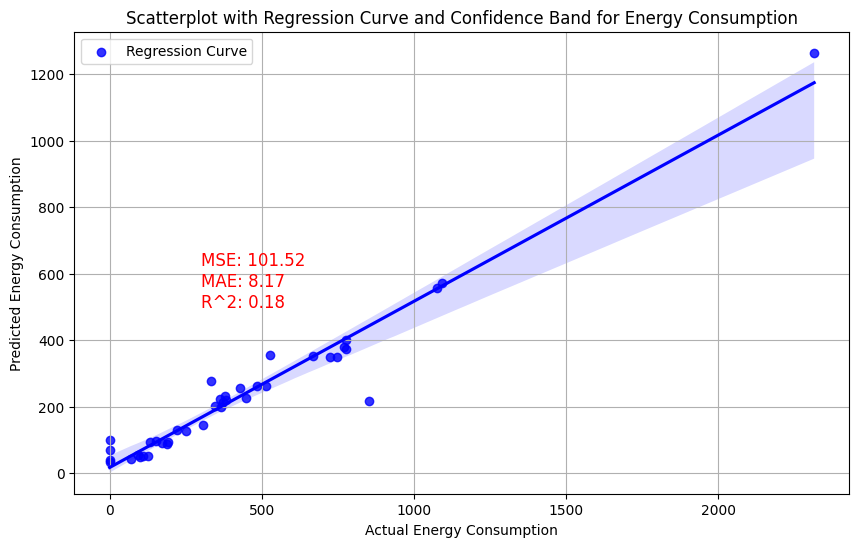

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.regplot(x=actual_energy_fold, y=preds_energy_fold, ci=95, label="Regression Curve", color='b')
plt.title('Scatterplot with Regression Curve and Confidence Band for Energy Consumption')
plt.xlabel('Actual Energy Consumption')
plt.ylabel('Predicted Energy Consumption')
plt.grid(True)

# Display metrics on the plot
plt.text(300, 500, f'MSE: {mse:.2f}\nMAE: {mae:.2f}\nR^2: {r2:.2f}', fontsize=12, color='red')

# Show the plot
plt.legend()
plt.show()

In [23]:
# Calculate mean and standard deviation for each metric
mean_mse_energy = np.mean(energy_consumption_mse)
std_mse_energy = np.std(energy_consumption_mse)
mean_mae_energy = np.mean(energy_consumption_mae)
std_mae_energy = np.std(energy_consumption_mae)
mean_r2_energy = np.mean(energy_consumption_r2)
std_r2_energy = np.std(energy_consumption_r2)
mean_mape_energy = np.mean(energy_consumption_mape)
std_mape_energy = np.std(energy_consumption_mape)
mean_rmse_energy = np.mean(energy_consumption_rmse)
std_rmse_energy = np.std(energy_consumption_rmse)

# Print results with mean and standard deviation
print("Energy Consumption Metrics:")
print(f"  MSE: {mean_mse_energy:.2f} ± {std_mse_energy:.2f} (over {num_folds} folds)")
print(f"  MAE: {mean_mae_energy:.2f} ± {std_mae_energy:.2f} (over {num_folds} folds)")
print(f"  R^2: {mean_r2_energy:.2f} ± {std_r2_energy:.2f} (over {num_folds} folds)")
print(f"  MAPE: {mean_mape_energy:.2f}% ± {std_mape_energy:.2f} (over {num_folds} folds)")
print(f"  RMSE: {mean_rmse_energy:.2f}% ± {std_rmse_energy:.2f} (over {num_folds} folds)")

Energy Consumption Metrics:
  MSE: 10580.27 ± 1206.96 (over 10 folds)
  MAE: 72.21 ± 4.60 (over 10 folds)
  R^2: 0.86 ± 0.02 (over 10 folds)
  MAPE: inf% ± nan (over 10 folds)
  RMSE: 102.69% ± 5.85 (over 10 folds)


/home/mixalako/Documents/EPU/INERGY/rea-uc/myenv/lib/python3.9/site-packages/numpy/core/_methods.py:236: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


In [25]:
best_mse = float('inf')  # Initialize with a high value
best_fold = None

for fold in range(num_folds):
    mse_energy = energy_consumption_mse[fold]

    if mse_energy < best_mse:
        best_mse = mse_energy
        best_fold = fold

print(f"Best Model (Fold) based on MSE for Energy Consumption: Fold {best_fold + 1}")

Best Model (Fold) based on MSE for Energy Consumption: Fold 9


In [24]:
results = trainer.test(model, test_loader)

/home/mixalako/Documents/EPU/INERGY/rea-uc/myenv/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:430: PossibleUserWarning: The dataloader, test_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Testing DataLoader 0: 100%|██████████| 39/39 [00:00<00:00, 162.91it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
           mse               0.620598554611206
        test_loss           0.6257916029566533
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


TEST Profiler Report

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|  Action                                                                                                                                                         	|  Mean duration (s)	|  Num calls      	|  Total time (s) 	|  Percentage %   	|
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|  Total                                                                                                                                                          	|  -              	|  97486          	

In [16]:
results

[{'test_loss': 0.6260857662158806, 'mse': 0.6207135915756226}]

In [17]:
predictions = trainer.predict(model, test_loader)

/home/mixalako/Documents/EPU/INERGY/rea-uc/myenv/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:430: PossibleUserWarning: The dataloader, predict_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting DataLoader 0: 100%|██████████| 39/39 [00:00<00:00, 292.64it/s]

PREDICT Profiler Report

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|  Action                                                                                                                                                         	|  Mean duration (s)	|  Num calls      	|  Total time (s) 	|  Percentage %   	|
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|  Total                                                                                                                                                          	|  -              	|  115492       

In [38]:
predictions

[(tensor([641.5787]),
  tensor([[8.4920e+02, 6.2326e+02, 4.4596e+03, 2.2560e+01, 1.1757e+03, 6.5091e-01,
           8.5135e-01, 9.8027e-01, 2.4295e+00, 2.0438e+00, 6.2968e-01, 4.2923e+01]])),
 (tensor([377.3192]),
  tensor([[7.9569e+02, 7.4187e+02, 2.6627e+03, 3.4197e+01, 6.2823e+02, 7.8073e-01,
           8.5459e-01, 9.1752e-01, 3.1523e+00, 2.0002e+00, 5.6887e-01, 4.9395e+01]])),
 (tensor([96.3238]),
  tensor([[292.0130, 283.2057, 502.5635,  10.1138,  76.5922,   0.7101,   1.0091,
             1.1018,   2.8936,   2.0626,   0.5842,  45.0526]])),
 (tensor([276.7243]),
  tensor([[5.8850e+02, 5.4492e+02, 1.3844e+03, 1.7109e+01, 4.2890e+02, 7.5588e-01,
           8.5680e-01, 1.2260e+00, 2.9472e+00, 2.0983e+00, 6.3628e-01, 4.9094e+01]])),
 (tensor([27.4791]),
  tensor([[147.7693, 157.0018, 149.5241,   7.0208, -57.7706,   0.7134,   1.0682,
             1.0240,   2.9129,   2.0491,   0.5748,  44.0583]])),
 (tensor([227.3888]),
  tensor([[4.8409e+02, 4.4969e+02, 1.1908e+03, 1.6289e+01, 3.2679e+0

In [18]:

energy_consumption_list = [item[0].item() for item in predictions]
energy_consumption_array = np.array(energy_consumption_list)
energy_consumption_df = pd.DataFrame({'energy_consumption': energy_consumption_array})

energy_consumption_df

,energy_consumption
0,603.047852
1,337.741882
2,103.775444
3,262.325134
4,53.316525
5,214.962341
6,55.651093
7,548.479370
8,184.694748
9,58.144672


In [19]:
actual_values_energy_consumption = test_dataset.data[test_dataset.val_cols]
actual_values_energy_consumption


,energy_consumption
228,672.6950
6,424.4050
79,150.6900
206,321.0575
117,100.1025
185,656.7475
242,103.8475
167,692.6800
9,263.9875
30,81.9100


In [20]:
predictions_list = [item[1].numpy().tolist()[0] for item in predictions]
predictions_array = np.array(predictions_list)
predictions_df = pd.DataFrame(predictions_array, columns=[f'Prediction_{i+1}' for i in range(predictions_array.shape[1])])
predictions_df

,Prediction_1,Prediction_2,Prediction_3,Prediction_4,Prediction_5,Prediction_6,Prediction_7,Prediction_8,Prediction_9,Prediction_10,Prediction_11,Prediction_12
0,856.096191,448.608521,4289.904785,26.799835,1005.314758,0.753641,0.857354,0.944758,2.631679,2.098849,0.690348,45.508167
1,732.864624,709.694397,2308.537354,32.409294,570.568909,0.788593,0.861823,0.903064,3.103319,2.017429,0.564705,48.890781
2,284.005615,293.427704,547.935669,9.370330,110.256737,0.699845,0.968248,1.055213,2.997631,2.047839,0.592637,43.973877
3,568.967102,548.403076,1366.623291,15.317554,383.007050,0.745512,0.896169,1.149825,2.989103,2.084726,0.626244,46.803677
4,189.097687,206.406631,270.421265,7.463178,22.211508,0.685177,0.990593,1.022876,2.992993,2.037415,0.583175,43.390568
5,466.183380,457.029633,1158.739136,14.206519,294.822662,0.732799,0.923716,1.121375,3.011304,2.075440,0.618302,45.713219
6,193.241364,210.088333,284.880981,7.555993,26.371603,0.685843,0.989710,1.023890,2.993451,2.037817,0.583601,43.411869
7,641.308533,538.267822,3607.594238,27.923250,1105.854492,0.762905,0.867208,0.832865,3.138371,2.090262,0.719714,44.530045
8,87.831459,61.208214,1699.064087,41.028645,216.621338,0.765836,0.879383,0.923183,3.112278,2.031733,0.589443,41.014091
9,197.394073,213.877243,299.307617,7.653665,30.550283,0.686551,0.988810,1.024973,2.993901,2.038199,0.584012,43.432049


In [21]:
actual_values = test_dataset.data[test_dataset.target_col]
actual_values


,area_Basement/slab,area_Roof/attic,area_Walls,area_doors,area_windows,U_Basement/slab,U_Roof/attic,U_Walls,U_doors,U_windows,air_exchange,specific_heat_gains
228,818.00,823.000,3813.000,43.00,995.000,0.810147,0.729040,1.177000,4.386047,2.138593,0.600,51.77
6,774.60,811.300,2287.320,34.00,536.880,1.215105,0.906138,0.913794,3.358824,2.000168,0.500,33.89
79,432.40,470.000,1810.200,5.00,190.200,0.460222,0.816596,0.456082,3.200000,1.988959,0.500,37.30
206,699.99,700.410,1424.480,20.60,557.210,0.625009,0.788824,1.491562,1.975728,2.353511,0.700,68.82
117,250.60,250.600,516.000,2.20,92.500,0.655148,0.839984,1.110000,3.572727,2.122811,0.550,48.00
185,581.70,581.700,1329.000,22.40,387.500,0.660186,0.840003,1.143100,2.833036,1.867535,0.600,52.47
242,249.90,249.900,498.500,3.10,93.000,0.569828,0.768307,1.134804,2.000000,1.743011,0.500,43.10
167,713.19,712.310,3049.330,22.63,1264.140,0.919993,0.752004,0.699636,2.800265,2.039964,0.840,39.86
9,257.90,257.900,1755.560,22.20,380.570,1.200000,1.500000,0.920390,3.351351,1.890033,0.500,38.70
30,199.50,250.000,528.000,3.40,144.100,0.560401,0.762400,1.031818,3.441176,2.165163,0.500,31.10


In [22]:

# Convert predictions dataframe to NumPy array
predicted_values = predictions_df.to_numpy()

# Convert actual values dataframe to NumPy array
actual_values_np = actual_values.to_numpy()

# Calculate evaluation metrics
mse = mean_squared_error(actual_values, predicted_values)
rmse = np.sqrt(mse)
mae = mean_absolute_error(actual_values, predicted_values)
r2 = r2_score(actual_values, predicted_values)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2 Score:", r2)

MSE: 60405.476492963666
RMSE: 245.77525606326537
MAE: 65.37344900191009
R2 Score: 0.37928640821327586


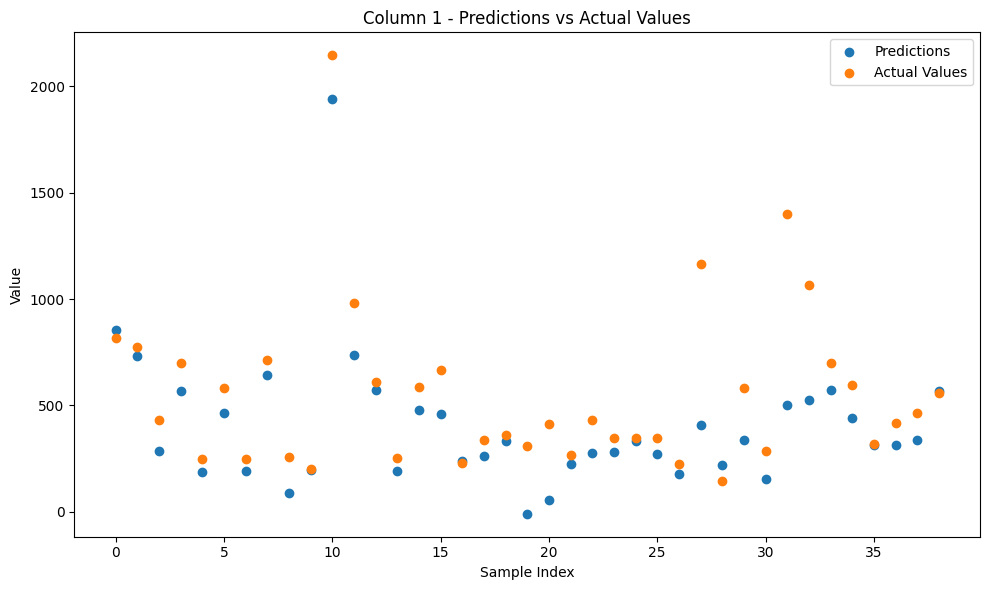

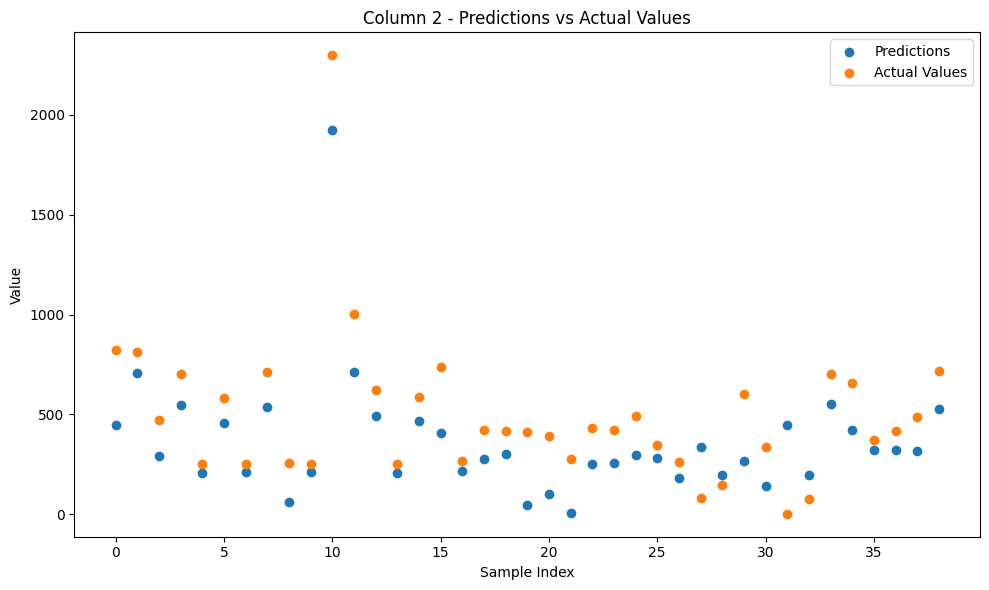

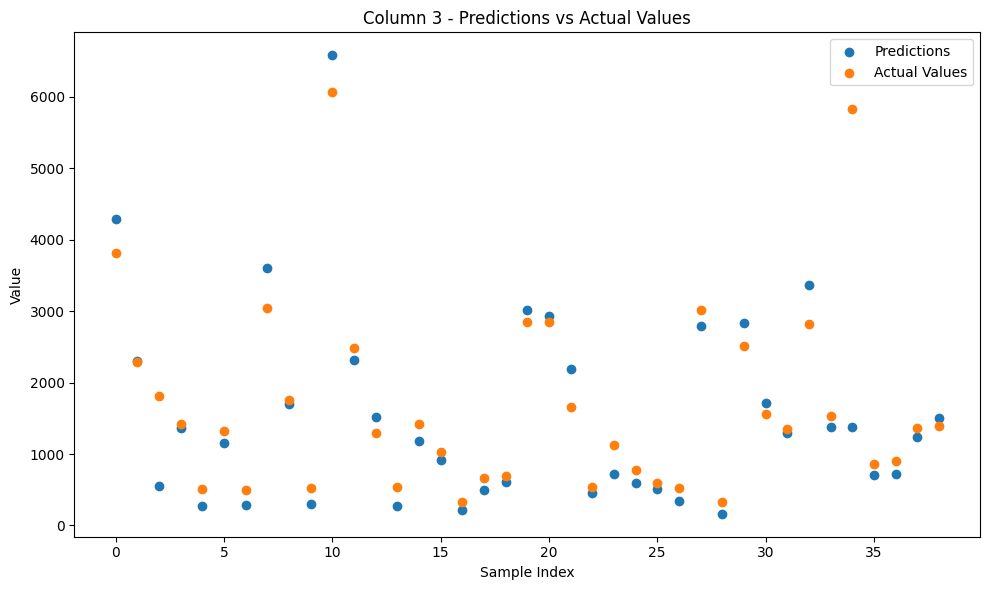

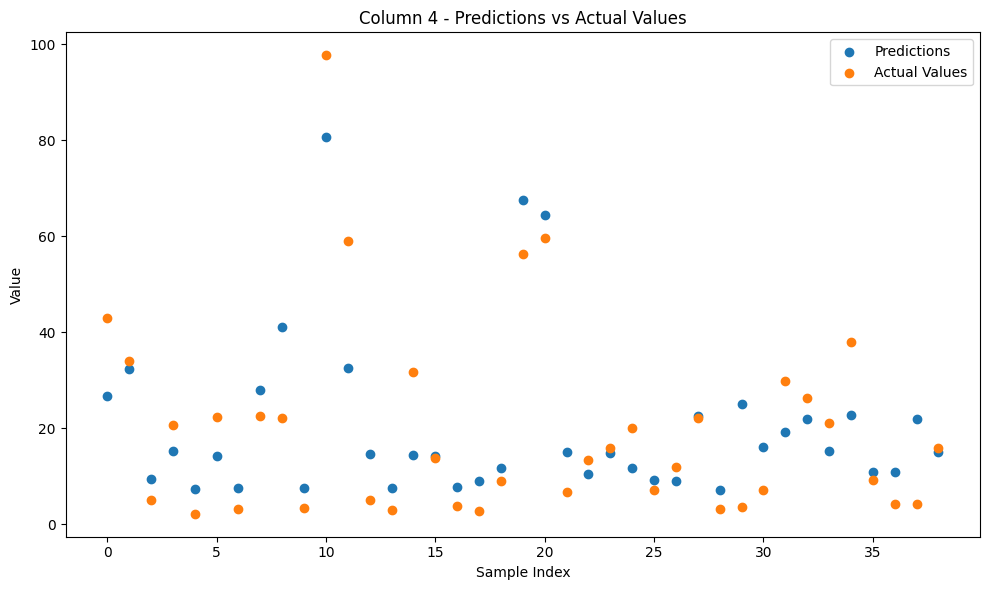

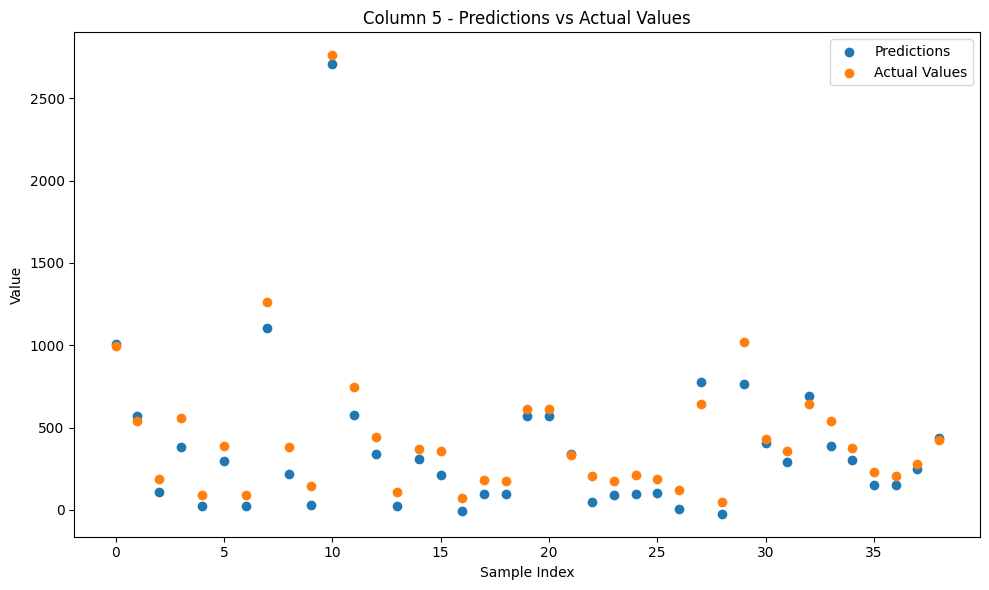

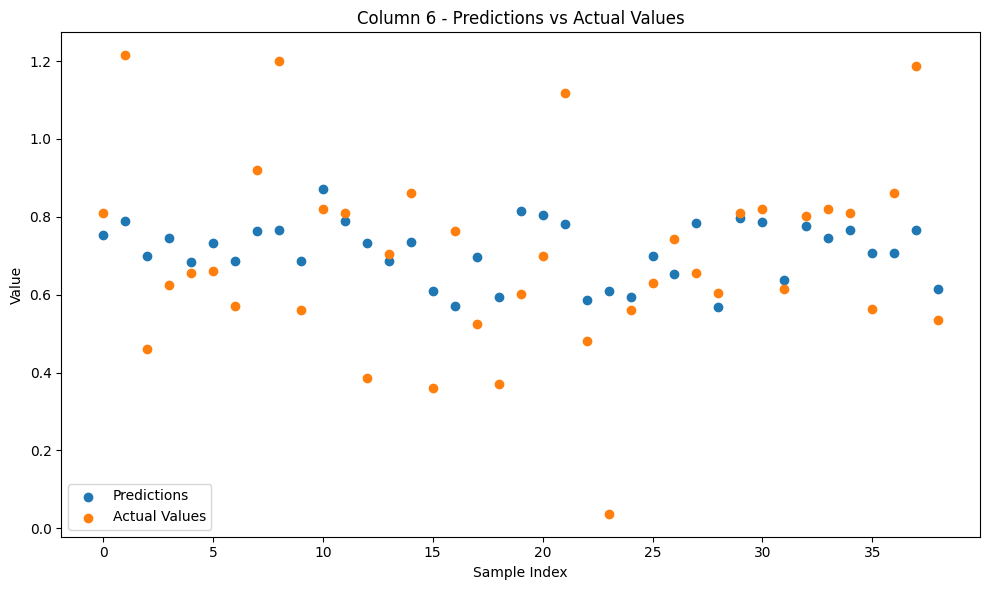

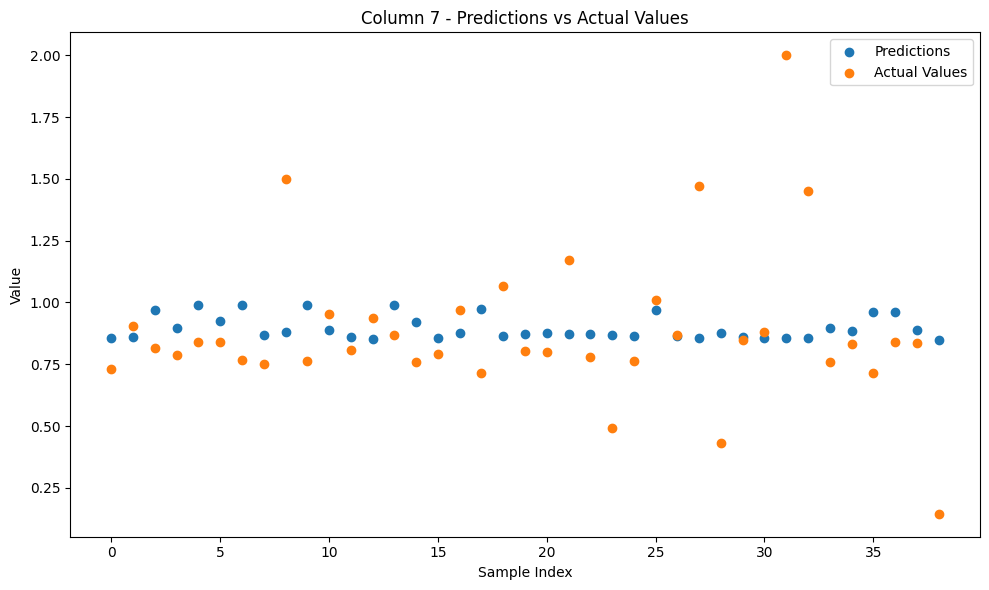

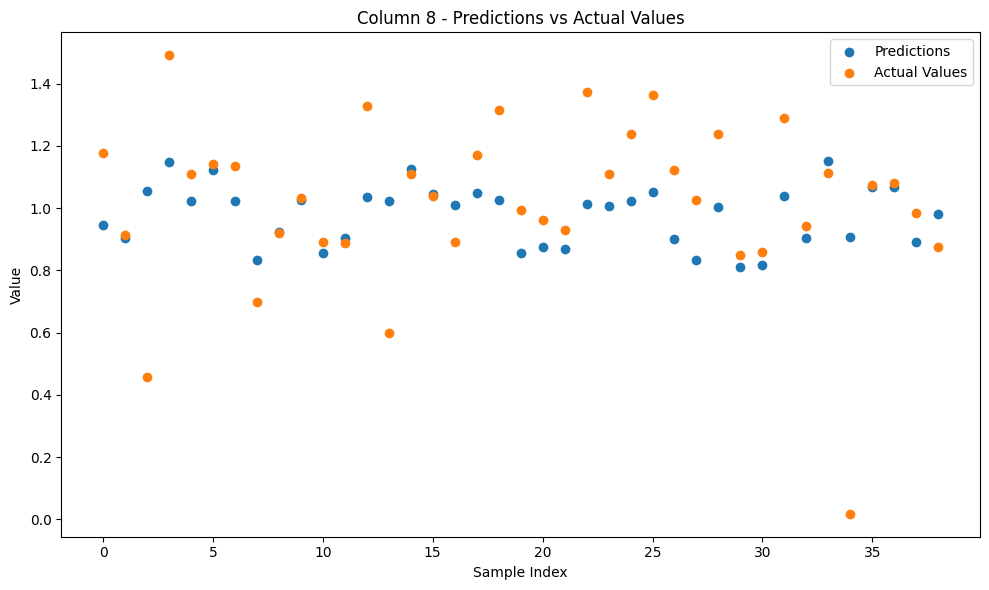

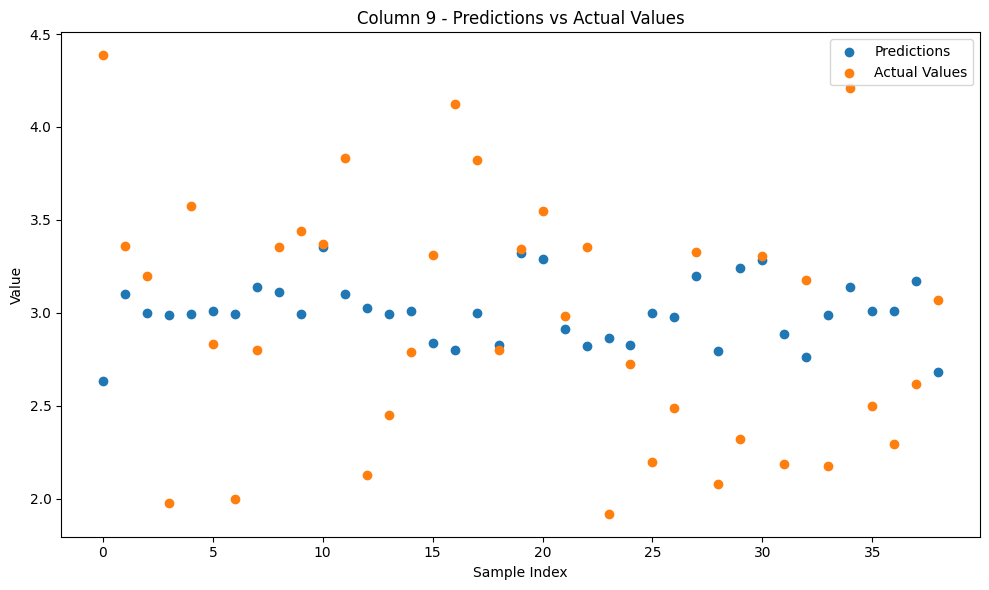

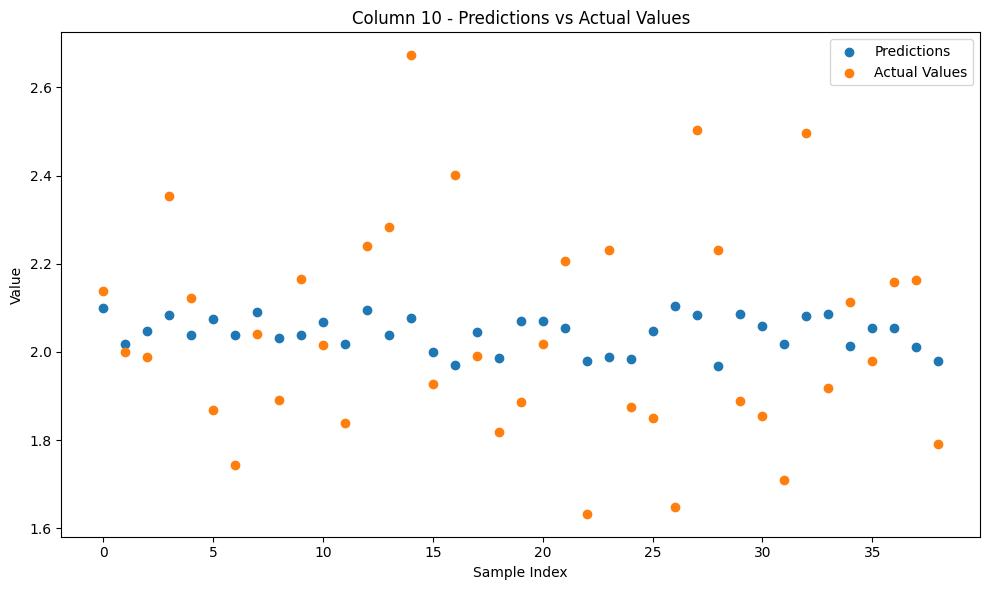

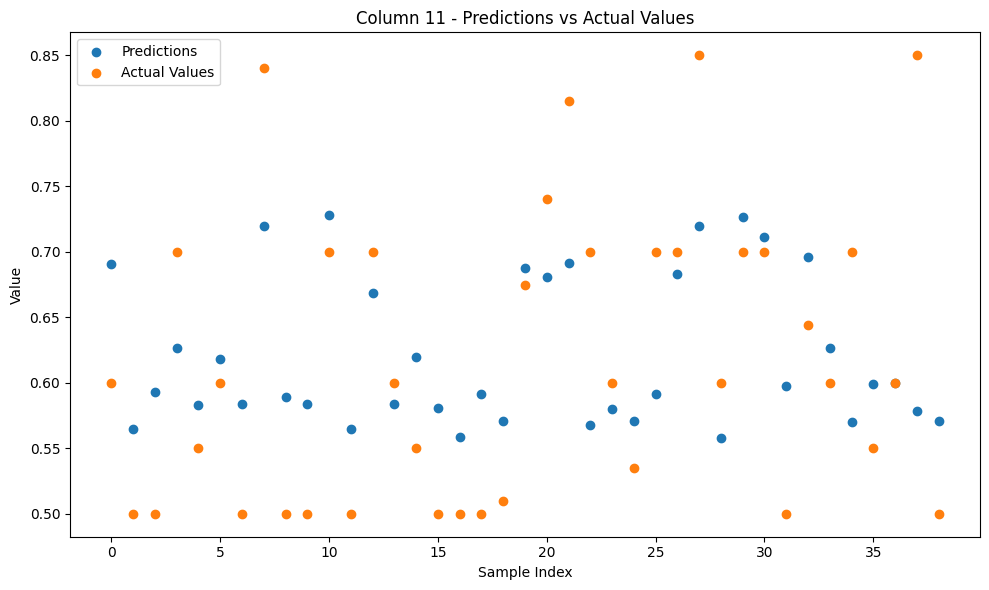

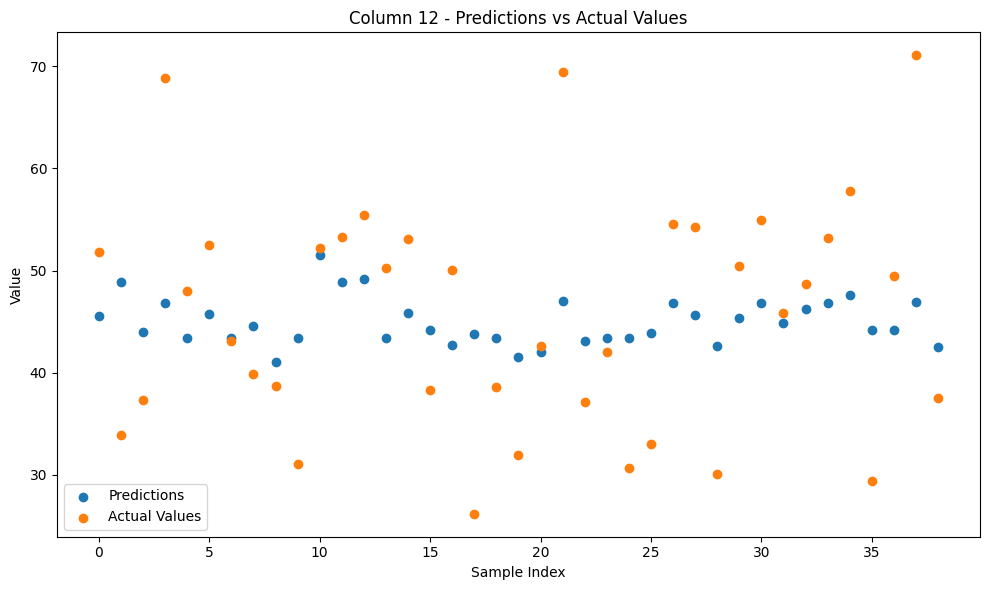

In [23]:
import matplotlib.pyplot as plt 
#Iterate over each column index in the actual values dataframe
for column_idx in range(len(actual_values.columns)):
    # Get the corresponding prediction and actual values based on column positions
    predictions = predictions_df.iloc[:, column_idx]
    actuals = actual_values.iloc[:, column_idx]

    # Create a scatter plot to compare the predictions and actual values
    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(predictions)), predictions, label="Predictions")
    plt.scatter(range(len(actuals)), actuals, label="Actual Values")
    plt.xlabel("Sample Index")
    plt.ylabel("Value")
    plt.title(f"Column {column_idx+1} - Predictions vs Actual Values")
    plt.legend()
    plt.tight_layout()
    plt.show()

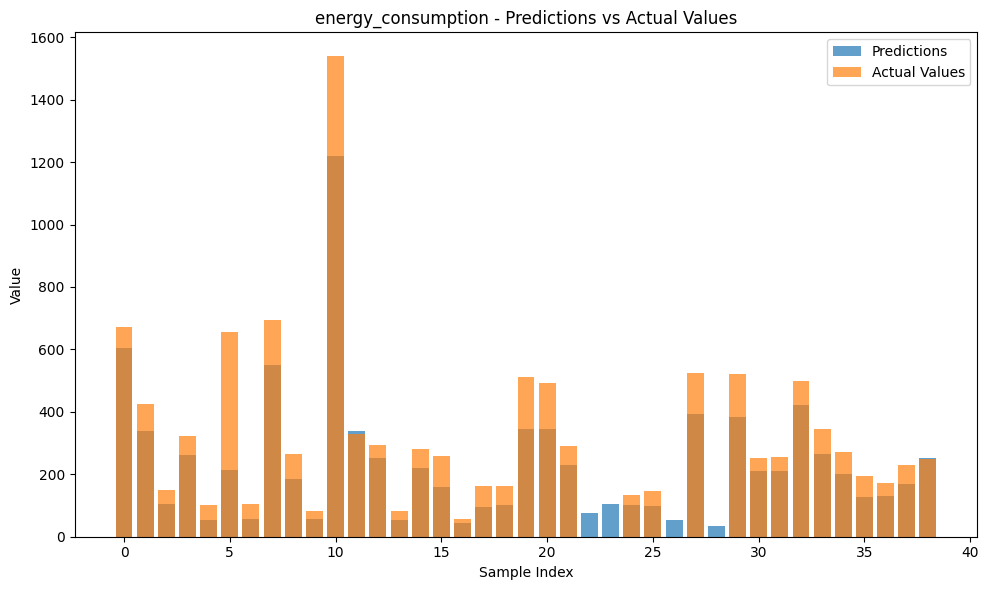

In [24]:

# Define the metric you want to compare (example: 'Prediction_1' vs 'Actual_1')
metric = 'energy_consumption'

# Get the corresponding prediction and actual values for the metric
predictions = energy_consumption_df[metric]
actuals = actual_values_energy_consumption['energy_consumption']

# Create a bar plot to compare the predictions and actual values
plt.figure(figsize=(10, 6))
plt.bar(range(len(predictions)), predictions, label="Predictions", alpha=0.7)
plt.bar(range(len(actuals)), actuals, label="Actual Values", alpha=0.7)
plt.xlabel("Sample Index")
plt.ylabel("Value")
plt.title(f"{metric} - Predictions vs Actual Values")
plt.legend()
plt.tight_layout()
plt.show()

In [23]:




# Define the metric you want to compare (example: 'Prediction_1' vs 'Actual_1')
metric = 'Prediction_1'

# Get the corresponding prediction and actual values for the metric
predictions = predictions_df[metric]
actuals = actual_values['area_Basement/slab']

# Create a bar plot to compare the predictions and actual values
plt.figure(figsize=(10, 6))
plt.bar(range(len(predictions)), predictions, label="Predictions", alpha=0.7)
plt.bar(range(len(actuals)), actuals, label="Actual Values", alpha=0.7)
plt.xlabel("Sample Index")
plt.ylabel("Value")
plt.title(f"{metric} - Predictions vs Actual Values")
plt.legend()
plt.tight_layout()
plt.show()

NameError: name 'predictions_df' is not defined